In [1]:
import pandas as pd
import numpy as np

In [3]:
link_df = pd.read_csv("links5.csv", index_col=0)
link_df.head()

,from,to,value,from_id,to_id
0,慶應義塾大学,研究,0.025952,4,171
1,慶應義塾大学,学部,0.022282,4,134
2,慶應義塾大学,月,0.020959,4,28
3,慶應義塾大学,学生,0.020782,4,58
4,慶應義塾大学,情報,0.019950,4,85


In [4]:
node_df = pd.read_csv("nodes5.csv", index_col=0)
node_df.head(6)

,query,from_ut,from_ky,from_wa,from_ko,from_me,shortest_step,label_ut,label_ky,label_wa,label_ko,label_me,index,label
0,東京大学,0,2,2,2,4,0,True,False,False,False,False,0,0
1,京都大学,2,0,2,2,3,0,False,True,False,False,False,1,1
2,明治大学,4,3,2,2,0,0,False,False,False,False,True,2,2
3,早稲田大学,2,2,0,2,2,0,False,False,True,False,False,3,3
4,慶應義塾大学,2,2,2,0,2,0,False,False,False,True,False,4,4
5,日本,3,3,3,3,4,3,True,True,True,True,False,5,3


In [5]:
node_df[node_df.shortest_step == 0]

,query,from_ut,from_ky,from_wa,from_ko,from_me,shortest_step,label_ut,label_ky,label_wa,label_ko,label_me,index,label
0,東京大学,0,2,2,2,4,0,True,False,False,False,False,0,0
1,京都大学,2,0,2,2,3,0,False,True,False,False,False,1,1
2,明治大学,4,3,2,2,0,0,False,False,False,False,True,2,2
3,早稲田大学,2,2,0,2,2,0,False,False,True,False,False,3,3
4,慶應義塾大学,2,2,2,0,2,0,False,False,False,True,False,4,4


In [6]:
node_ids = node_df['index'].values

In [7]:
from_ids =  np.array(link_df.from_id)
to_ids = np.array(link_df.to_id)
distances = np.array(node_df.shortest_step)
from numpy.random import *
start_positions = uniform(-2,2, (len(node_ids), 3))
start_positions[0] = np.array([-1,1,1])
start_positions[1] = np.array([-1,-1,-1])
start_positions[2] = np.array([1,1,-1])
start_positions[3] = np.array([1,-1,1])
start_positions[4] = np.array([-1,1,-1])
import copy
positions = copy.deepcopy(start_positions)

In [8]:
import copy
positions = copy.deepcopy(start_positions)
for i in range(500): 
    Fs = [0]* len(node_ids)
    for node_id in node_ids:
        if node_id not in [0, 1, 2, 3, 4]:
            P = positions[node_id]
            F = np.array([0, 0, 0])
            linked_node_ids = to_ids[np.where(from_ids == node_id)]
            for node_i_id in linked_node_ids:
                D_i = float(distances[node_i_id] + 1)
                P_i = positions[node_i_id]
                x_i = (P_i - P) - ((P_i - P) / np.linalg.norm(P_i - P)) # バネの伸びベクトル(バネのもとの長さは1)
                F_i = x_i * (1/D_i)  # Nに働く力ベクトルを算出(バネ定数はD_iの逆数)
                F = F + F_i
            Fs[node_id] = F * D_i * 0.001
    for node_id in node_ids:
        positions[node_id] = positions[node_id] + Fs[node_id]
    if i % 10 == 0:
        print(np.sum(np.absolute(np.array(Fs[5:]))))

1.32092919301
1.20966253606
1.11513482743
1.03477052119
0.965814570248
0.904923919987
0.850356046898
0.801591087202
0.757227576715
0.716297360899
0.678829490452
0.644227548613
0.612638582467
0.583734671996
0.557008246982
0.532369652651
0.509731663256
0.489162912132
0.470150054604
0.452056351492
0.435003091326
0.418989913066
0.404025917905
0.390074733569
0.376926457054
0.364494126027
0.352727587147
0.341578792267
0.331049449343
0.321084604733
0.311707873752
0.302797640826
0.294328135119
0.286463140756
0.279113686686
0.272118760569
0.265455126575
0.259080192675
0.252936336898
0.247004063786
0.241323737791
0.235818890016
0.230477621191
0.22531231606
0.22035064197
0.21554545293
0.210909396518
0.206428031884
0.202074162415
0.197925313183


In [9]:
# pd.DataFrame(positions, columns=['x','y','z']).to_csv('normal.csv')
# pd.DataFrame(positions, columns=['x','y','z']).to_csv('position.csv')

In [10]:
start_positions

array([[-1.        ,  1.        ,  1.        ],
       [-1.        , -1.        , -1.        ],
       [ 1.        ,  1.        , -1.        ],
       [ 1.        , -1.        ,  1.        ],
       [-1.        ,  1.        , -1.        ],
       [-1.042592  , -0.00909976,  0.95158817],
       [ 0.27509164,  0.72276508, -0.91533697],
       [-0.29968624, -0.7807852 , -0.51359886],
       [ 0.65369611,  0.2684733 ,  1.21800773],
       [ 0.09175295,  0.37304321, -0.965236  ],
       [-0.79531474,  0.65099703,  0.85482572],
       [ 0.37231276,  0.60610979, -1.77373959],
       [ 0.34443878, -0.63056238, -1.87677115],
       [-1.05188959, -0.82349771, -1.28981923],
       [ 0.26515181,  1.32212301,  0.63795883],
       [ 0.89437323,  1.17064245, -0.60332664],
       [-1.78331032,  1.92660007,  1.3899814 ],
       [-1.08237207, -0.67045032, -1.52436821],
       [-1.42219505,  1.33415917,  1.44321107],
       [ 1.54296823,  1.36389497, -1.01848995],
       [-1.501028  , -0.90479375,  0.535

In [11]:
positions

array([[ -1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [ -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,  -1.00000000e+00],
       [  1.00000000e+00,  -1.00000000e+00,   1.00000000e+00],
       [ -1.00000000e+00,   1.00000000e+00,  -1.00000000e+00],
       [ -7.69558854e-01,   1.64001758e-01,   1.04576256e+00],
       [  1.38255546e-01,   5.84807292e-01,  -8.24143164e-01],
       [ -5.73458459e-02,  -5.00129701e-01,  -5.51811843e-01],
       [ -1.10163762e-01,   1.90076978e-01,   2.62736628e-01],
       [ -4.64399198e-02,   1.88929688e-01,  -9.66985806e-01],
       [ -7.01015616e-01,   7.12917690e-01,   5.59252012e-01],
       [  4.53621427e-01,   3.73596497e-01,  -9.47722992e-01],
       [  2.09826454e-01,  -2.39907904e-01,  -1.14119802e+00],
       [ -7.97308742e-01,  -5.74047888e-01,  -9.09028819e-01],
       [  4.05638337e-02,   5.78606201e-01,   1.29197201e-01],
       [  5.35174369e-01,   1.12253740e+00,  -2.9057794

In [12]:
pos_df = pd.read_csv('./position/position5.csv',index_col=0)

In [17]:
pos_df['x'] = 1

In [18]:
pos_df

,x,y,z
0,1,1.000000,1.000000
1,1,-1.000000,-1.000000
2,1,1.000000,-1.000000
3,1,-1.000000,1.000000
4,1,1.000000,-1.000000
5,1,0.835704,0.424405
6,1,1.710974,1.388277
7,1,-0.133208,-0.264525
8,1,-0.687812,-1.763700
9,1,0.491723,1.171539


In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

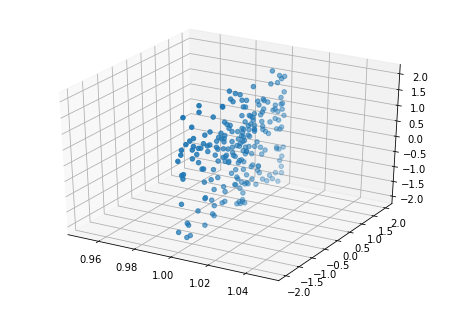

In [19]:
fig=plt.figure()
ax=Axes3D(fig)

xs = pos_df['x']
ys = pos_df['y']
zs = pos_df['z']
ax.scatter3D(xs, ys, zs)
plt.show()